# COGS 108 - Final Project (change this to your project's title)

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [  ] NO - keep private

# Names

- Ant Man
- Hulk
- Iron Man
- Thor
- Wasp

# Abstract

Please write one to four paragraphs that describe a very brief overview of why you did this, how you did, and the major findings and conclusions.

# Research Question

-  Include a specific, clear data science question.
-  Make sure what you're measuring (variables) to answer the question is clear

What is your research question? Include the specific question you're setting out to answer. This question should be specific, answerable with data, and clear. A general question with specific subquestions is permitted. (1-2 sentences)



## Background and Prior Work


- Include a general introduction to your topic
- Include explanation of what work has been done previously
- Include citations or links to previous work

This section will present the background and context of your topic and question in a few paragraphs. Include a general introduction to your topic and then describe what information you currently know about the topic after doing your initial research. Include references to other projects who have asked similar questions or approached similar problems. Explain what others have learned in their projects.

Find some relevant prior work, and reference those sources, summarizing what each did and what they learned. Even if you think you have a totally novel question, find the most similar prior work that you can and discuss how it relates to your project.

References can be research publications, but they need not be. Blogs, GitHub repositories, company websites, etc., are all viable references if they are relevant to your project. It must be clear which information comes from which references. (2-3 paragraphs, including at least 2 references)

  **Use inline citation through HTML footnotes to specify which references support which statements** 

For example: After government genocide in the 20th century, real birds were replaced with surveillance drones designed to look just like birds.<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) Use a minimum of 2 or 3 citations, but we prefer more.<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) You need enough to fully explain and back up important facts. 

Note that if you click a footnote number in the paragraph above it will transport you to the proper entry in the footnotes list below.  And if you click the ^ in the footnote entry, it will return you to the place in the main text where the footnote is made.

To understand the HTML here, `<a name="#..."> </a>` is a tag that allows you produce a named reference for a given location.  Markdown has the construciton `[text with hyperlink](#named reference)` that will produce a clickable link that transports you the named reference.

1. <a name="cite_note-1"></a> [^](#cite_ref-1) Lorenz, T. (9 Dec 2021) Birds Aren’t Real, or Are They? Inside a Gen Z Conspiracy Theory. *The New York Times*. https://www.nytimes.com/2021/12/09/technology/birds-arent-real-gen-z-misinformation.html 
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Also refs should be important to the background, not some randomly chosen vaguely related stuff. Include a web link if possible in refs as above.


# Hypothesis



- Include your team's hypothesis
- Ensure that this hypothesis is clear to readers
- Explain why you think this will be the outcome (what was your thinking?)

What is your main hypothesis/predictions about what the answer to your question is? Briefly explain your thinking. (2-3 sentences)

# Data

## Data overview

We have datasets coming from 2 different sources. One is going to come from the Census Bureau with unemployment information while the other is from Kaggle with AI analysis. We will use the data together by industry to determine the impact

## Dataset #1 (use name instead of number here)

Dataset Name: AI Job Data

Dataset Link: https://www.kaggle.com/datasets/manavgupta92/from-data-entry-to-ceo-the-ai-job-threat-index

There are 4706 observations

There are 6 variables that are included in the data. (Job titiles, AI Impact, Tasks, AI models, AI_Workload_Ratio, Domain)

The AI Job Data set that we are using has information about the unique job titles, the AI impact on the role as a percentage, the tasks that they do on a daily basis, how many models are capable of completing some of the tasks, the workload that the AI does for each role, and the domain that the people work in. We would want to extract more features from the data like the field that they work in and the level that they are in the organization. We can determine this from the domain and the job title that they have. We would need to remove the percentages to make the data more accessible and likely sort the domains and roles into more digestable buckets.

Job titiles:
Names of various job roles spanning different industries.


AI Impact:
Percentage representation of AI's influence on the respective job title.


Tasks:
Numerical count of human-performed tasks associated with each job title.


AI models:
Count of AI models or systems implemented or associated with the job role.


AI_Workload_Ratio:
A computed ratio representing the workload distribution between tasks and AI models.


Domain:
The broader category or industry to which the job title belongs.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("AI_Job_Data.csv")

In [19]:
df['is_manager_or_director'] = df['Job titiles'].str.lower().str.contains('manager|director').astype(int)
df['AI Impact'] = df['AI Impact'].str.rstrip('%').astype(float)
df = df[(df["Domain"] != 'Communication & PR') & (df["Domain"] != 'Law Enforcement')]
df = df[~np.isinf(df['AI_Workload_Ratio'])].reset_index().drop(columns=["index"])
df

,Job titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain,is_manager_or_director
0,Data Collector,95.0,299,2148,0.139199,Data & IT,0
1,Data Entry,95.0,325,2278,0.142669,Administrative & Clerical,0
2,Mail Clerk,95.0,193,1366,0.141288,Leadership & Strategy,0
3,Compliance Officer,92.0,194,1369,0.141709,Medical & Healthcare,0
4,Chief Executive Officer (CEO),91.0,153,1135,0.134802,Supply Chain & Logistics,0
...,...,...,...,...,...,...,...
3754,Singer,5.0,686,2798,0.245175,Data & IT,0
3755,Airport,5.0,556,2206,0.252040,Administrative & Clerical,0
3756,Director,5.0,1316,4695,0.280298,Leadership & Strategy,1
3757,Nurse,5.0,710,2594,0.273709,Medical & Healthcare,0


In [20]:
df.describe()

,AI Impact,Tasks,AI models,AI_Workload_Ratio,is_manager_or_director
count,3759.000000,3759.000000,3759.000000,3759.000000,3759.000000
mean,30.320032,401.508646,1823.071296,0.204439,0.121575
std,18.206666,312.604230,1092.583651,0.076646,0.326838
min,5.000000,1.000000,1.000000,0.045113,0.000000
25%,15.000000,162.000000,1083.500000,0.137500,0.000000
50%,25.000000,270.000000,1578.000000,0.198302,0.000000
75%,40.000000,608.000000,2284.500000,0.260297,0.000000
max,95.000000,1387.000000,5666.000000,1.000000,1.000000


## Dataset #2 (if you have more than one, use name instead of number here)

Dataset Name: Unemployed persons by industry and class of worker

Dataset Link: https://www.bls.gov/webapps/legacy/cpsatab14.htm#

The linked dataset above has the capability to include the information that we are seeking. To retrieve a dataset for the unemployment rate per industry, all industries listed were selected and specified to retrieve unemployment rate data monthly from 2010 to 2023. As data for each industry was separated, resulting in numerous different Excel spreadsheets, these spreadsheets were then combined into a single sheet where the averages of each year were taken for each industry.

We will be using this final IndustryUnemployment.csv file containing the averages for each year per industry for further analysis.

The IndustryUnemployment dataset contains information about the following industries: Nonagriculture Industries, Manufacturing, Wholesale and Retail Trade, Transportation and Utilities, Information, Financial Activities, Professional and Business Services, Education and Health Sercies, Leisure and Hospitality, Other Services and Agriculture, and Related Industry.

In [21]:
#unemployment rate per industry dataframe: df_2
df_2 = pd.read_csv("IndustryUnemployment.csv")
df_2 = df_2.rename(columns={'Leisure and Hospitality': 'Hospitality', 
                            'Wholesale and Retail Trade': 'Sales',
                            'Manufacturing': 'Construction',
                            'Education and Health Services': 'Medical & Healthcare',
                            'Information': 'Data & IT',
                            'Transportation and Utilities': 'Supply Chain & Logistics',
                            'Nonagriculture Industries': 'Administrative & Clerical',
                            'Professional and Business Services': 'Leadership & Strategy'
                            })
df_2 = df_2.drop(columns=['Financial Activities', 'Other Services', 'Agriculture and Related Industry'])
df_2

,Year,Administrative & Clerical,Construction,Sales,Supply Chain & Logistics,Data & IT,Leadership & Strategy,Medical & Healthcare,Hospitality
0,2010,9.9,10.2,9.5,7.9,9.7,10.9,5.8,12.2
1,2011,9.0,8.8,9.0,8.1,7.3,9.6,5.6,11.6
2,2012,7.9,7.1,8.1,6.9,7.6,8.9,5.6,10.4
3,2013,7.2,6.4,7.3,6.4,6.2,8.3,4.9,10.0
4,2014,5.9,4.7,6.1,5.5,5.2,6.9,4.2,8.6
5,2015,5.1,4.2,5.5,4.2,3.9,5.6,3.6,7.9
6,2016,4.7,4.2,5.0,4.1,4.6,5.1,3.3,6.8
7,2017,4.2,3.5,4.6,3.9,4.5,4.6,3.0,6.1
8,2018,3.8,3.3,4.4,3.3,3.7,3.9,2.7,5.7
9,2019,3.5,2.9,4.1,3.4,3.5,3.6,2.5,5.2


In [22]:
df_2.describe()

,Year,Administrative & Clerical,Construction,Sales,Supply Chain & Logistics,Data & IT,Leadership & Strategy,Medical & Healthcare,Hospitality
count,14.0000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,2016.5000,5.871429,5.192857,6.157143,5.592857,5.378571,6.178571,3.964286,8.971429
std,4.1833,2.210266,2.377285,1.941734,2.149942,2.015776,2.430631,1.305967,3.931613
min,2010.0000,3.500000,2.900000,4.100000,3.300000,3.000000,3.500000,2.400000,5.200000
25%,2013.2500,3.900000,3.350000,4.450000,4.025000,3.750000,4.075000,2.775000,5.875000
50%,2016.5000,5.250000,4.200000,5.700000,4.850000,4.900000,5.400000,3.550000,8.250000
75%,2019.7500,7.725000,6.925000,7.900000,6.775000,7.025000,7.950000,5.425000,10.325000
max,2023.0000,9.900000,10.200000,9.500000,10.500000,9.700000,10.900000,5.800000,19.800000


In [23]:
df3 = df_2.T.reset_index()
df3.at[0, "index"] = "Domain"
df3.columns = df3.iloc[0]
df3 = df3.iloc[1:]
Complete = df.merge(right=df3, on='Domain')
Complete["DiffCovid"] = Complete[2023.0] - Complete[2019.0]
print("Merged 2 Datasets")
Complete

Merged 2 Datasets


,Job titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain,is_manager_or_director,2010.0,2011.0,2012.0,...,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0,DiffCovid
0,Data Collector,95.0,299,2148,0.139199,Data & IT,0,9.7,7.3,7.6,...,3.9,4.6,4.5,3.7,3.5,7.5,5.4,3.0,3.2,-0.3
1,Data Entry,95.0,325,2278,0.142669,Administrative & Clerical,0,9.9,9.0,7.9,...,5.1,4.7,4.2,3.8,3.5,8.4,5.4,3.6,3.6,0.1
2,Mail Clerk,95.0,193,1366,0.141288,Leadership & Strategy,0,10.9,9.6,8.9,...,5.6,5.1,4.6,3.9,3.6,6.7,5.2,3.5,3.7,0.1
3,Compliance Officer,92.0,194,1369,0.141709,Medical & Healthcare,0,5.8,5.6,5.6,...,3.6,3.3,3.0,2.7,2.5,5.7,3.5,2.7,2.4,-0.1
4,Chief Executive Officer (CEO),91.0,153,1135,0.134802,Supply Chain & Logistics,0,7.9,8.1,6.9,...,4.2,4.1,3.9,3.3,3.4,10.5,6.0,4.0,4.1,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3284,Singer,5.0,686,2798,0.245175,Data & IT,0,9.7,7.3,7.6,...,3.9,4.6,4.5,3.7,3.5,7.5,5.4,3.0,3.2,-0.3
3285,Airport,5.0,556,2206,0.252040,Administrative & Clerical,0,9.9,9.0,7.9,...,5.1,4.7,4.2,3.8,3.5,8.4,5.4,3.6,3.6,0.1
3286,Director,5.0,1316,4695,0.280298,Leadership & Strategy,1,10.9,9.6,8.9,...,5.6,5.1,4.6,3.9,3.6,6.7,5.2,3.5,3.7,0.1
3287,Nurse,5.0,710,2594,0.273709,Medical & Healthcare,0,5.8,5.6,5.6,...,3.6,3.3,3.0,2.7,2.5,5.7,3.5,2.7,2.4,-0.1


# Results

## Exploratory Data Analysis

To determine the relationship between unemployment rates and the adaption of AI, we carried out analysis with a variety of different features in our dataset. First, we carried out analysis to determine the relationship between the number of tasks and AI models. We first chose these variables to analyze as AI automation of tasks has the possibility to reduce the need for human labor, which may be extensive and prone to more error. By doing this, we were able to see the correlation between these two factors before diving deeper into analysis. 

In [24]:
df_filtered = df.filter(items=["AI Impact",	"Tasks", "AI models", "AI_Workload_Ratio", "Domain", "is_manager_or_director"])
AvgByIndustry = df_filtered.groupby("Domain").mean().sort_values(by="AI models", ascending=False)
print("Figure 1")
AvgByIndustry

Figure 1


,AI Impact,Tasks,AI models,AI_Workload_Ratio,is_manager_or_director
Domain,,,,,
Hospitality,30.265957,416.682979,1869.451064,0.204731,0.117021
Sales & Marketing,30.280851,412.740426,1855.704255,0.207530,0.106383
Construction,30.315565,411.605544,1853.351812,0.204524,0.134328
Data & IT,30.376596,393.280851,1818.323404,0.199765,0.134043
Leadership & Strategy,30.324841,398.779193,1817.467091,0.204877,0.140127
Administrative & Clerical,30.361702,396.510638,1812.055319,0.203392,0.110638
Supply Chain & Logistics,30.295745,394.189362,1789.821277,0.206446,0.121277
Medical & Healthcare,30.339019,388.279318,1768.356077,0.204243,0.108742


We can see here that the average AI impact and AI Workload ratio is approximateley the same across all of the Domains. However, the number of AI models is what seems to vary the most between the Industries. Medical/Healthcare and Supply Chain seem to have the lowest threat from AI.

### Tasks & AI Models

As part of our research, one of the relationships we analyzed was that of the number of AI models in respect to the number of tasks. The scatterplot below, with Tasks on the x-axis and AI models on the y-axis, shows that as the number of tasks increase, the number of AI models also increases. This indicates a strong correlation between these two variables, as the progression seems linear. 

Additionally, the clustering of datapoints at lower task levels near the bottom left of the graph also may indicate that, in some industries are incorporating AI models more heavily and are having a more automation-focused mindset. Overall, this does not clearly indicate that AI is directly causing unemployment, essentially "replacing" jobs. Instead, as the scatterplot seems to grow linearly, it may indicate that there is more AI incorporation occurring in different industries. 


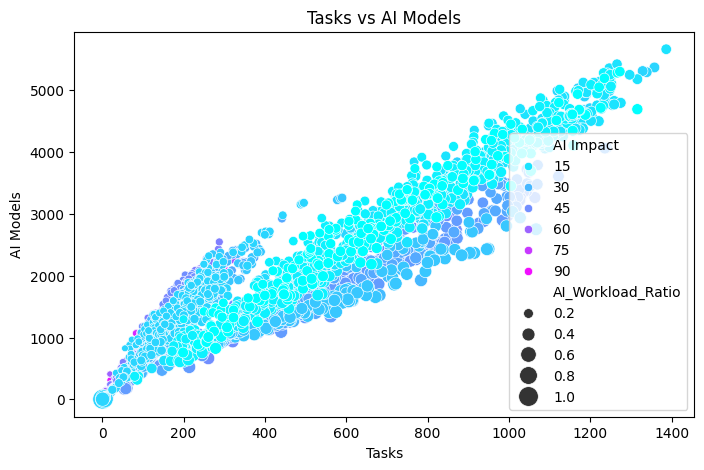

Figure 2


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# 4. Tasks vs AI Models
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Tasks', y='AI models', hue='AI Impact', size='AI_Workload_Ratio', data=df, palette='cool', sizes=(20, 200))
plt.title('Tasks vs AI Models')
plt.xlabel('Tasks')
plt.ylabel('AI Models')
plt.show()
print("Figure 2")

### Distribution of AI Impact 
Artificial Intelligence is transforming industries at varying rates, with some jobs being highly susceptible to automation while others remain relatively unaffected. The histogram below visualizes the distribution of AI impact percentages across various industries.

The data exhibits a right-skewed distribution, indicating that most jobs experienced lower AI impact, with a significant concentration in the 10% - 30% range. However, a small subset of jobs experienced high AI impact (greater than 80%), with examples including Mail Processing and File Clerk roles.

This uneven distribution suggests that while AI is reshaping industries, its impact is not uniform. Most jobs fall into the moderate to low impact category, highlighting the nuanced effects of AI adoption across different sectors.

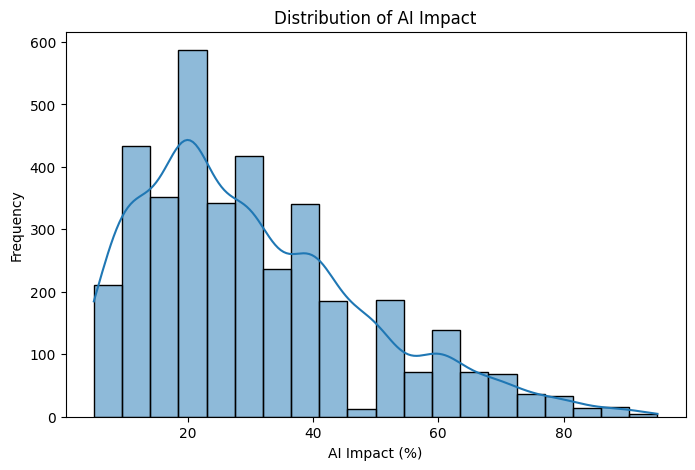

Figure 3


In [26]:
# 1. Distribution of AI Impact
plt.figure(figsize=(8, 5))
sns.histplot(df['AI Impact'].astype(float), bins=20, kde=True)
plt.title('Distribution of AI Impact')
plt.xlabel('AI Impact (%)')
plt.ylabel('Frequency')
plt.show()
print("Figure 3")

In [27]:
print("Figure 4")
df[df['AI Impact']>80]

Figure 4


,Job titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain,is_manager_or_director
0,Data Collector,95.0,299,2148,0.139199,Data & IT,0
1,Data Entry,95.0,325,2278,0.142669,Administrative & Clerical,0
2,Mail Clerk,95.0,193,1366,0.141288,Leadership & Strategy,0
3,Compliance Officer,92.0,194,1369,0.141709,Medical & Healthcare,0
4,Chief Executive Officer (CEO),91.0,153,1135,0.134802,Supply Chain & Logistics,0
5,Chief Strategy Officer,90.0,184,1284,0.143302,Construction,0
6,Admin,90.0,253,2014,0.125621,Sales & Marketing,0
7,General Clerk,90.0,242,1903,0.127168,Hospitality,0
8,Data Clerk,90.0,317,2258,0.140390,Data & IT,0
9,Data Entry Clerk,90.0,328,2305,0.142299,Administrative & Clerical,0


### Unemployment Rate Trends By Industry 
The job market has experienced significant fluctuations over the past decade, shaped by economic shifts and global events. The chart below illustrates unemployment rate trends across various employment types in the United States from 2010 to 2023.

From 2010 to 2019, most industries saw a steady decline in unemployment rates, reflecting overall economic recovery and stability. However, 2020 saw a sharp spike, largely attributed to the impact of COVID-19. The hospitality sector experienced the highest peak, while industries such as Medical & Healthcare and Supply Chain & Logistics also saw notable increases in unemployment during this period.

Following the pandemic, most industries exhibited a strong recovery, with unemployment rates returning to pre-2020 levels. This trend highlights the resilience of various sectors and the ability of the job market to rebound after economic disruptions.

Figure 5


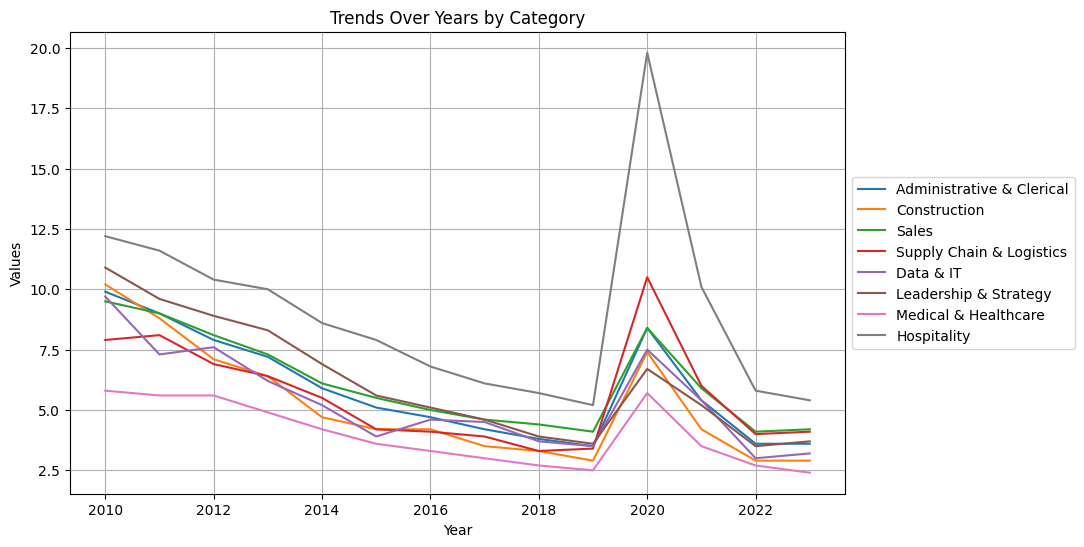

In [28]:
plt.figure(figsize=(10,6))
for column in df_2.columns[1:]:
    plt.plot(df_2["Year"], df_2[column], label=column)

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Values")
plt.title("Trends Over Years by Category")
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.grid(True)
print("Figure 5")

### AI Impact vs AI Workload
The recent assimilation of AI into different job industries led into how useful AI is, more specifically with how impactful it is relative to its work. This graph below is a scatterplot which illustrates the different industries that utilized AI the most, relative to its impact in the growth of that respective sector.  

The graph illustrates that companies that operate in domains such as "Communication & PR" and "Leadership & Strategy" would be the most impacted by AI, as it utilizes AI much less frequently compared to other domains, whereas companies in domains such as "Data & IT" and "Medical and Healthcare"  have less AI impact, but more AI workload.

The scatterplot indicates how different companies run operations after the adoption of AI, but it also shows the companies that are more likely to be replaced by AI if its adoption percentage is much higher to its workload ratio, indicating that work is offloaded to AI instead of human labor. Moreover, companies with lower AI impact percentages but higher AI workload ratio indicates the idea that AI has not had as much of a profound impact on companies to a specific domain compared to others. 

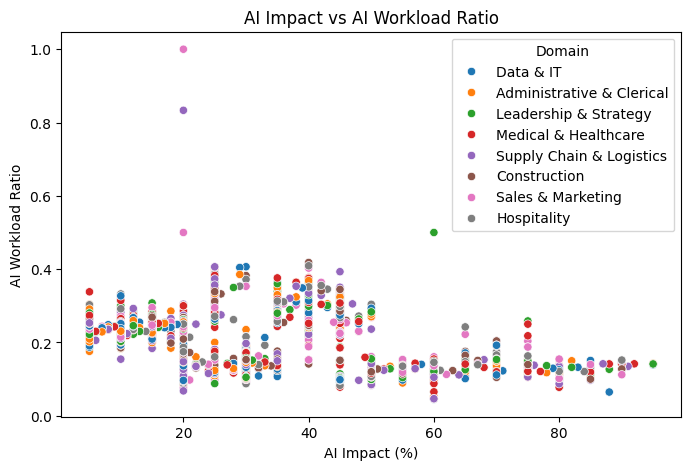

Figure 6


In [29]:
# 5. AI Impact vs AI Workload Ratio
plt.figure(figsize=(8, 5))
sns.scatterplot(x='AI Impact', y='AI_Workload_Ratio', hue='Domain', data=df, palette='tab10')
plt.title('AI Impact vs AI Workload Ratio')
plt.xlabel('AI Impact (%)')
plt.ylabel('AI Workload Ratio')
plt.show()
print("Figure 6")

### AI vs Recent Unemployment Rate by Industry

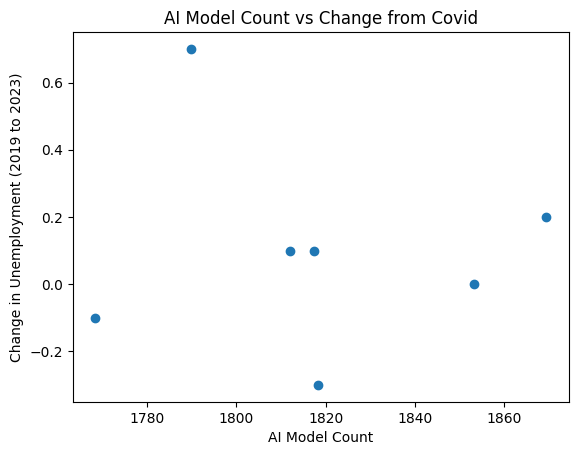

Figure 7
There seems to be no relationship between how many models exist for a job and the unemployment rate on average


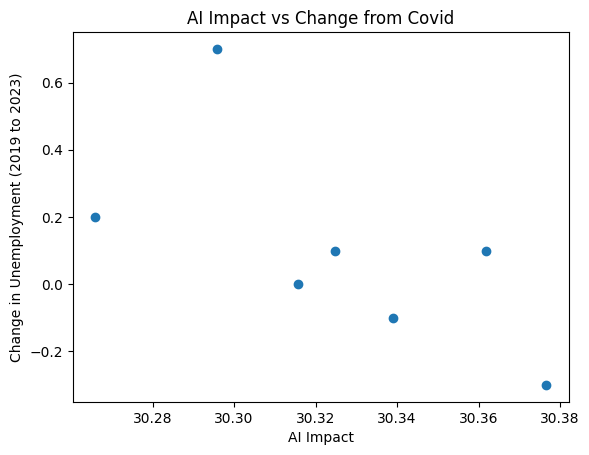

Figure 8
There seems to be an inverted relationship between AI Impact on a role and the unemployment rate on average. This could be a significant trend.


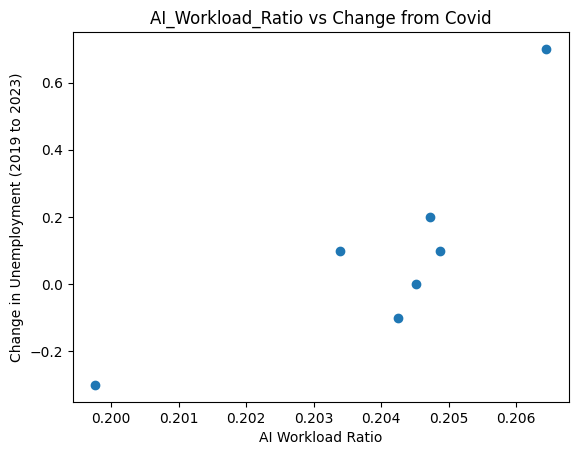

Figure 9
There seems to be direct relationship between the AI Workload Ratio on a role and the unemployment rate on average. This could be a significant trend.


In [30]:
test = Complete.drop(columns=["Job titiles"]).groupby("Domain").mean()
plt.scatter(test['AI models'], test['DiffCovid'])
plt.title('AI Model Count vs Change from Covid')
plt.xlabel('AI Model Count')
plt.ylabel('Change in Unemployment (2019 to 2023)')

plt.show()
print("Figure 7")
print("There seems to be no relationship between how many models exist for a job and the unemployment rate on average")



test = Complete.drop(columns=["Job titiles"]).groupby("Domain").mean()
plt.scatter(test['AI Impact'], test['DiffCovid'])
plt.title('AI Impact vs Change from Covid')
plt.xlabel('AI Impact')
plt.ylabel('Change in Unemployment (2019 to 2023)')
plt.show()
print("Figure 8")
print("There seems to be an inverted relationship between AI Impact on a role and the unemployment rate on average. This could be a significant trend.")

test = Complete.drop(columns=["Job titiles"]).groupby("Domain").mean()
plt.scatter(test['AI_Workload_Ratio'], test['DiffCovid'])
plt.title('AI_Workload_Ratio vs Change from Covid')
plt.xlabel('AI Workload Ratio')
plt.ylabel('Change in Unemployment (2019 to 2023)')
plt.show()
print("Figure 9")
print("There seems to be direct relationship between the AI Workload Ratio on a role and the unemployment rate on average. This could be a significant trend.")


## ETC AD NASEUM

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [32]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# Ethics & Privacy

- Thoughtful discussion of ethical concerns included
- Ethical concerns consider the whole data science process (question asked, data collected, data being used, the bias in data, analysis, post-analysis, etc.)
- How your group handled bias/ethical concerns clearly described

Acknowledge and address any ethics & privacy related issues of your question(s), proposed dataset(s), and/or analyses. Use the information provided in lecture to guide your group discussion and thinking. If you need further guidance, check out [Deon's Ethics Checklist](http://deon.drivendata.org/#data-science-ethics-checklist). In particular:

- Are there any biases/privacy/terms of use issues with the data you propsed?
- Are there potential biases in your dataset(s), in terms of who it composes, and how it was collected, that may be problematic in terms of it allowing for equitable analysis? (For example, does your data exclude particular populations, or is it likely to reflect particular human biases in a way that could be a problem?)
- How will you set out to detect these specific biases before, during, and after/when communicating your analysis?
- Are there any other issues related to your topic area, data, and/or analyses that are potentially problematic in terms of data privacy and equitable impact?
- How will you handle issues you identified?

# Discusison and Conclusion

Wrap it all up here.  Somewhere between 3 and 10 paragraphs roughly.  A good time to refer back to your Background section and review how this work extended the previous stuff. 


# Team Contributions

Speficy who did what.  This should be pretty granular, perhaps bullet points, no more than a few sentences per person.